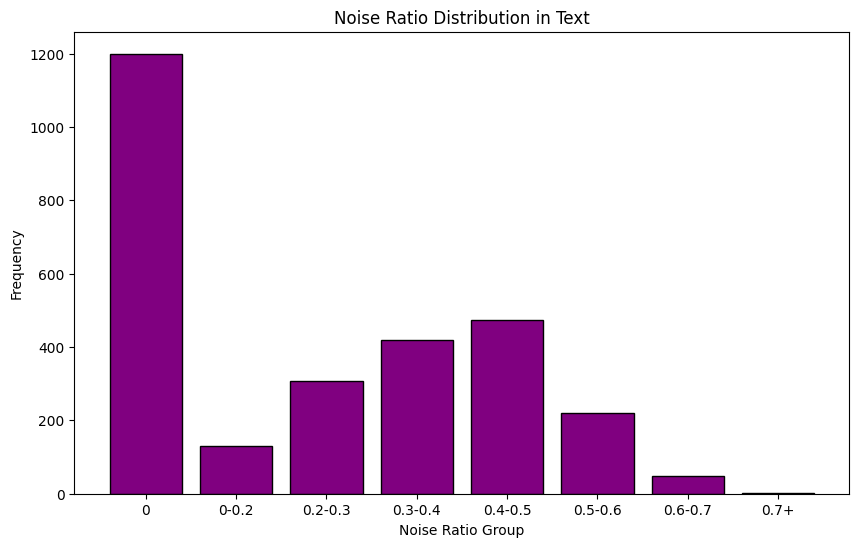

noise_group
0          1200
0-0.2       129
0.2-0.3     308
0.3-0.4     419
0.4-0.5     473
0.5-0.6     220
0.6-0.7      49
0.7+          2
Name: count, dtype: int64


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

file_path = "original_train.csv"
data = pd.read_csv(file_path)

allowed_terms = [
    'SERICEO', 'APTLD', 'K 시리즈', 'KAIST', 'MWC19', 'NBIoT', 'U파손도움', 'VR·AR', 'u3000', '갤럭시A9', '갤럭시S8', '아이폰XR', '태블릿PC', 
    'ALCS', 'ETRI', 'FARC', 'GSMA', 'H7N9', 'KISA', 'OECD', 'RCEP', 'S400', 'S500', 'K시리즈', 'T멤버십', 'UCLA', 'UEFA', 'USTR', 'WNBA', 'ai.x', 
    'e스포츠', '스마트X', '아이폰X', '67P', '75t', 'ACM', 'AFC', 'APT', 'ATM', 'AWS', 'AfD', 'A매치', 'B2B', 'B52', 'BMW', 'BeY', 'CBS', 'CCO', 'CEO', 'CPU', 'CSD', 
    'DMZ', 'EBS', 'ELS', 'EPL', 'ETF', 'F35', 'FFP', 'G20', 'G20', 'HDC', 'IBK', 'IBM', 'ICT', 'IPO', 'IRP', 'ISA', 'IoT', 'KAT', 'KBO', 'KBO', 'KBS', 'KEB', 'KGC', 'KTB', 'K리그', 
    'LGU', 'LNG', 'LPG', 'LTE', 'MBC', 'MLB', 'MMT', 'MOU', 'MVP', 'MWC', 'NBA', 'NEW', 'NHK', 'NHN', 'NSA', 'N여행', 'PVC', 'RFA', 'S10', 'SBS', 'SDI', 'SKB', 'SKT', 'SKT', 'SNS', 
    'TBN', 'TPP', 'U19', 'U20', 'UAE', 'UAR', 'UCC', 'URL', 'USC', 'V30', 'V50', 'V리그', 'WON', 'WTI', 'WTO', 'aix', 'com', 'iOS', 'tbs', '채널A', '%P', '%p', '3D', '3Q', '5G', 
    'A8', 'AG', 'AI', 'AS', 'Be', 'CJ', 'C조', 'D8', 'DB', 'EM', 'ES', 'EU', 'FA', 'FC', 'FK', 'G6', 'G7', 'G8', 'GB', 'GS', 'HF', 'IC', 'IP', 'IS', 'IT', 'KB', 'KT', 'K리', 'K콘', 
    'LA', 'LD', 'LG', 'LH', 'LS', 'ML', 'MS', 'NC', 'NH', 'NO', 'OK', 'PC', 'PF', 'PO', 'PS', 'RD', 'S9', 'SA', 'SK', 'ST', 'SW', 'S펜', 'TI', 'TK', 'TV', 'T맵', 'VR', 'VS', 'WS', 'X6', 'XR', 
    'kt', 'vs', ',', '.', 'm', '|', '·', '…', '⅔', '↑', '→', '↓', '↔', '∼', '③', '④', 'ㆍ', '㎜', '㎝', '㎡', '＋', 'ｍ', '2％'
]

def calculate_noise_ratio(text):
    text = text.replace(" ", "")
    for term in allowed_terms:
        text = text.replace(term, "")
    text = re.sub(r'(?<=\d)%', '', text)
    non_korean_text = re.sub(r'[가-힣0-9\u4e00-\u9fff]', '', text)
    return len(non_korean_text) / len(text) if len(text) > 0 else 0

# 노이즈 비율 계산
data['noise_ratio'] = data['text'].apply(calculate_noise_ratio)

# 노이즈 비율에 따라 그룹화
bins = [-0.01, 0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1]
labels = ['0', '0-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7+']
data['noise_group'] = pd.cut(data['noise_ratio'], bins=bins, labels=labels, include_lowest=True)

# 각 그룹의 개수 계산
noise_counts = data['noise_group'].value_counts().sort_index()

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.bar(noise_counts.index, noise_counts.values, color='purple', edgecolor='black')
plt.title("Noise Ratio Distribution in Text")
plt.xlabel("Noise Ratio Group")
plt.ylabel("Frequency")
plt.show()

print(noise_counts)

In [256]:
import pandas as pd
import re
import matplotlib.pyplot as plt

file_path = "original_train.csv"
data = pd.read_csv(file_path)

allowed_terms = [
    'SERICEO', 'APTLD', 'K 시리즈', 'KAIST', 'MWC19', 'NBIoT', 'U파손도움', 'VR·AR', 'u3000', '갤럭시A9', '갤럭시S8', '아이폰XR', '태블릿PC', 
    'ALCS', 'ETRI', 'FARC', 'GSMA', 'H7N9', 'KISA', 'OECD', 'RCEP', 'S400', 'S500', 'K시리즈', 'T멤버십', 'UCLA', 'UEFA', 'USTR', 'WNBA', 'ai.x', 
    'e스포츠', '스마트X', '아이폰X', '67P', '75t', 'ACM', 'AFC', 'APT', 'ATM', 'AWS', 'AfD', 'A매치', 'B2B', 'B52', 'BMW', 'BeY', 'CBS', 'CCO', 'CEO', 'CPU', 'CSD', 
    'DMZ', 'EBS', 'ELS', 'EPL', 'ETF', 'F35', 'FFP', 'G20', 'G20', 'HDC', 'IBK', 'IBM', 'ICT', 'IPO', 'IRP', 'ISA', 'IoT', 'KAT', 'KBO', 'KBO', 'KBS', 'KEB', 'KGC', 'KTB', 'K리그', 
    'LGU', 'LNG', 'LPG', 'LTE', 'MBC', 'MLB', 'MMT', 'MOU', 'MVP', 'MWC', 'NBA', 'NEW', 'NHK', 'NHN', 'NSA', 'N여행', 'PVC', 'RFA', 'S10', 'SBS', 'SDI', 'SKB', 'SKT', 'SKT', 'SNS', 
    'TBN', 'TPP', 'U19', 'U20', 'UAE', 'UAR', 'UCC', 'URL', 'USC', 'V30', 'V50', 'V리그', 'WON', 'WTI', 'WTO', 'aix', 'com', 'iOS', 'tbs', '채널A', '%P', '%p', '3D', '3Q', '5G', 
    'A8', 'AG', 'AI', 'AS', 'Be', 'CJ', 'C조', 'D8', 'DB', 'EM', 'ES', 'EU', 'FA', 'FC', 'FK', 'G6', 'G7', 'G8', 'GB', 'GS', 'HF', 'IC', 'IP', 'IS', 'IT', 'KB', 'KT', 'K리', 'K콘', 
    'LA', 'LD', 'LG', 'LH', 'LS', 'ML', 'MS', 'NC', 'NH', 'NO', 'OK', 'PC', 'PF', 'PO', 'PS', 'RD', 'S9', 'SA', 'SK', 'ST', 'SW', 'S펜', 'TI', 'TK', 'TV', 'T맵', 'VR', 'VS', 'WS', 'X6', 'XR', 
    'kt', 'vs', ',', '.', 'm', '|', '·', '…', '⅔', '↑', '→', '↓', '↔', '∼', '③', '④', 'ㆍ', '㎜', '㎝', '㎡', '＋', 'ｍ', '2％'
]

def calculate_noise_ratio(text):
    text = text.replace(" ", "")
    for term in allowed_terms:
        text = text.replace(term, "")
    text = re.sub(r'(?<=\d)%', '', text)
    non_korean_text = re.sub(r'[가-힣0-9\u4e00-\u9fff]', '', text)
    return len(non_korean_text) / len(text) if len(text) > 0 else 0

data['noise_ratio'] = data['text'].apply(calculate_noise_ratio)

bins = [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1]
labels = ['0', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8+']
data['noise_group'] = pd.cut(data['noise_ratio'], bins=bins, labels=labels, include_lowest=True)

noise_data = data[data['noise_ratio'] > 0].copy()
clean_data = data[data['noise_ratio'] == 0].copy()

noise_data[['ID', 'text', 'target']].to_csv("noise_train.csv", index=False)
print(len(noise_data))

clean_data[['ID', 'text', 'target']].to_csv("clean_train.csv", index=False)
print(len(clean_data))

1600
1200
